In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = r'C:\Users\irekt\Desktop\jdsz3-zczasem\ProjektML'
filename = '/Dane/Carseats.csv'
os.chdir(path)

In [3]:
df = pd.read_csv(path + filename)
df.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [5]:
df[['Urban', 'US']] = df[['Urban', 'US']].replace({'Yes':1, 'No':0})

In [6]:
categorical_cols = ['ShelveLoc']
df_categorical_dummies = pd.get_dummies(df[categorical_cols])
print(df_categorical_dummies.head())

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium
0              1               0                 0
1              0               1                 0
2              0               0                 1
3              0               0                 1
4              1               0                 0


In [7]:
df = pd.concat([df, df_categorical_dummies], axis = 1)
df.drop(categorical_cols, axis = 1, inplace = True)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,138,73,11,276,120,42,17,1,1,1,0,0
1,11.22,111,48,16,260,83,65,10,1,1,0,1,0
2,10.06,113,35,10,269,80,59,12,1,1,0,0,1
3,7.40,117,100,4,466,97,55,14,1,1,0,0,1
4,4.15,141,64,3,340,128,38,13,1,0,1,0,0


In [8]:
df.to_csv('Dane/Carseats_Clean.csv', index=False)

In [9]:
df_cls = df
df_cls['Sales_class'] = ''

przedzialy = {}

df_cls['Sales_class'] = np.where(df_cls['Sales'] < df_cls['Sales'].quantile(0.333), 'LOW', np.where(df_cls['Sales'] < df_cls['Sales'].quantile(0.666), 'MED', 'HIGH'))

df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Sales_class
0,9.50,138,73,11,276,120,42,17,1,1,1,0,0,HIGH
1,11.22,111,48,16,260,83,65,10,1,1,0,1,0,HIGH
2,10.06,113,35,10,269,80,59,12,1,1,0,0,1,HIGH
3,7.40,117,100,4,466,97,55,14,1,1,0,0,1,MED
4,4.15,141,64,3,340,128,38,13,1,0,1,0,0,LOW


## KNN regresja dla sales jako wartość docelowa

In [10]:
%matplotlib inline
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_boston

In [11]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000,0.705000,0.645000,0.240000,0.212500,0.547500
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528,0.456614,0.479113,0.427618,0.409589,0.498362
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
#podział danych na testowe i treningowe
X = df.drop(['Sales','Sales_class','Population','Urban','US','Education'], axis=1).values.astype('float')
y = df['Sales'].values.astype('float') 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=444)


In [13]:
# normalizacja
scaler = MinMaxScaler()
scaler.fit(X_train)
norm_x_train = scaler.transform(X_train)
norm_x_test = scaler.transform(X_test)

In [14]:
#pierwszy model
b_reg = KNeighborsRegressor(n_neighbors=4)
b_reg.fit(norm_x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')

In [15]:
# test bez dopasowania parametrów
preds = b_reg.predict(norm_x_test)
r2_score(y_test, preds)

0.49690124645368616

In [16]:
# próba poprawy poprzez zmianę parametrów
best_score = 0.0
best_params = {}

for neighbors in range(1, 101):
    for w in ["uniform", "distance"]:
        for p in [1, 2]:
            regressor = KNeighborsRegressor(n_neighbors=neighbors, p=p, weights=w)
            scores = cross_val_score(regressor, norm_x_train, y_train, cv=5)
            score = scores.mean()
            if score > best_score:
                best_score = score
                best_params["neighbors"] = neighbors
                best_params["weights"] = w
                best_params["p"] = p
print(best_score)
print(best_params)

0.5264638350225649
{'neighbors': 4, 'weights': 'distance', 'p': 1}


In [17]:
# wynik po dopasowaniu parametrów
regressor = KNeighborsRegressor(n_neighbors=best_params["neighbors"],
                                p=best_params["p"],
                                weights=best_params["weights"])
regressor.fit(norm_x_train, y_train)
preds = regressor.predict(norm_x_test)
r2_score(y_test, preds)

0.5489130476955151

## KNN klasyfikacja dla sales_class jako wartość docelowa

In [18]:
#podział danych na testowe i treningowe
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X = df_cls.drop(['Sales','Sales_class','Urban','US','Education'], axis=1).values.astype('float')
y = df_cls['Sales_class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=444)

In [19]:
scaler = MinMaxScaler()
scaler.fit(X_train)
norm_x_train = scaler.transform(X_train)
norm_x_test = scaler.transform(X_test)

In [20]:
b_classifier = KNeighborsClassifier(n_neighbors=4)
b_classifier.fit(norm_x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [21]:
preds = b_classifier.predict(norm_x_test)
accuracy_score(y_test, preds)

0.546875

In [22]:
best_score = 0.0
best_params = {}

for neighbors in range(1, 50):
    for w in ["uniform", "distance"]:
        for p in [1, 2]:
            classifier = KNeighborsClassifier(n_neighbors=neighbors, p=p, weights=w)
            scores = cross_val_score(classifier, norm_x_train, y_train, cv=5)
            score = scores.mean()
            if score > best_score:
                best_score = score
                best_params["neighbors"] = neighbors
                best_params["weights"] = w
                best_params["p"] = p
print(best_score)
print(best_params)

0.6449673202614379
{'neighbors': 6, 'weights': 'uniform', 'p': 2}


In [23]:
classifier = KNeighborsClassifier(n_neighbors=best_params["neighbors"],
                                  p=best_params["p"],
                                  weights=best_params["weights"])
classifier.fit(norm_x_train, y_train)
preds = classifier.predict(norm_x_test)
accuracy_score(y_test, preds)

0.56875

## SVM - SVR regresja dla sales jako wartość docelowa

In [24]:
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_boston
from sklearn import svm
from sklearn.metrics import accuracy_score


In [25]:
#podział danych na testowe i treningowe
X = df.drop(['Sales','Sales_class'], axis=1).values.astype('float')
y = df['Sales'].values.astype('float') 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=444)

In [26]:
# normalizacja
scaler = MinMaxScaler()
scaler.fit(X_train)
norm_x_train = scaler.transform(X_train)
norm_x_test = scaler.transform(X_test)

In [27]:
# próba poprawy poprzez zmianę parametrów
best_score = 0.0
best_params = {}

for kernel in ["linear", "poly", "rbf", "sigmoid"]:
    regressor = svm.SVR(kernel=kernel)
    scores = cross_val_score(regressor, norm_x_train, y_train, cv=5)
    score = scores.mean()
    if score > best_score:
        best_score = score
        best_params["kernel"] = kernel

print(best_score)
print(best_params)

0.7593101284672572
{'kernel': 'linear'}


C:\Users\irekt\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\irekt\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\irekt\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\irekt\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

In [28]:
clf = svm.SVR(kernel= best_params["kernel"])
clf.fit(norm_x_train, y_train)
# model accuracy for X_test
y_pred = clf.predict(norm_x_test)

In [29]:
preds = clf.predict(norm_x_test)
r2_score(y_test, preds)

0.7700013217250563

## SVM - SVC klasyfikacja dla sales_class jako wartość docelowa

In [30]:
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_boston
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [31]:
#podział danych na testowe i treningowe

X = df_cls.drop(['Sales','Sales_class'], axis=1).values.astype('float')
y = df_cls['Sales_class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# próba poprawy poprzez zmianę parametrów
best_score = 0.0
best_params = {}

for kernel in ["linear", "poly", "rbf", "sigmoid"]:
    regressor = svm.SVC(kernel=kernel, gamma='auto'))
    scores = cross_val_score(regressor, X_train, y_train, cv=5)
    score = scores.mean()
    if score > best_score:
        best_score = score
        best_params["kernel"] = kernel

print(best_score)
print(best_params)

C:\Users\irekt\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\irekt\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [32]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
# model accuracy for X_test
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("acc: ", acc)

acc:  0.7125


## Bayesian Ridge Regression

In [33]:
from sklearn.linear_model import BayesianRidge

In [34]:
X = df.drop(['Sales','Sales_class'], axis=1).values.astype('float')
y = df['Sales'].values.astype('float') 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=444)

In [35]:
clf = BayesianRidge()
clf.fit(X_train, y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [37]:
y_pred = clf.predict(X_test) 
preds = clf.predict(X_test)
print(r2_score(y_test, preds))



0.8490802072795941


## random forest


In [38]:
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_boston

In [39]:
X = df.drop(['Sales','Sales_class'], axis=1).values.astype('float')
y = df['Sales'].values.astype('float') 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=4992)
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

C:\Users\irekt\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [40]:
rf_regressor.score(X_test, y_test)

0.5743696594973781

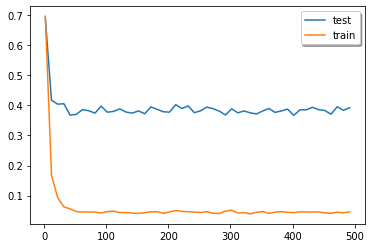

In [41]:
rng = range(2,500,10)
error_train = []
error_test = []
for i in rng:
    rf_regressor = RandomForestRegressor(n_estimators = 80, max_leaf_nodes=i)
    rf_regressor.fit(X_train, y_train)
    error_train.append(1 - rf_regressor.score(X_train, y_train))
    error_test.append(1 - rf_regressor.score(X_test, y_test))

plt.plot(rng, error_test, label="test")
plt.plot(rng, error_train, label="train")
plt.legend(shadow=True)
plt.show()

## XGBOOST

In [42]:
from xgboost import XGBRegressor
X = df.drop(['Sales','Sales_class'], axis=1).values.astype('float')
y = df['Sales'].values.astype('float') 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=4992)


In [43]:
model = XGBRegressor()
model.fit(X_train, y_train)

[18:58:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [44]:
# make predictions for test data
y_pred = model.predict(X_test)

print(r2_score(y_test, y_pred))


0.6752771854592657


## AdaBoost

In [51]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
X = df.drop(['Sales','Sales_class'], axis=1).values.astype('float')
y = df['Sales'].values.astype('float') 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=4992)

In [53]:
scaler = MinMaxScaler()
scaler.fit(X_train)
norm_x_train = scaler.transform(X_train)
norm_x_test = scaler.transform(X_test)

In [54]:
best_score = 0.0
best_params = {}

for n_estimators in range(1, 100):
    for loss in ["linear", "square", "exponential"]:
        classifier = AdaBoostRegressor(n_estimators=n_estimators, loss=loss)
        scores = cross_val_score(classifier, norm_x_train, y_train, cv=5)
        score = scores.mean()
        if score > best_score:
            best_score = score
            best_params["n_estimators"] = n_estimators
            best_params["loss"] = loss
print(best_score)
print(best_params)

0.6871260820442574
{'n_estimators': 93, 'loss': 'square'}


In [57]:
classifier = AdaBoostRegressor(n_estimators=best_params["n_estimators"],
                                  loss=best_params["loss"])
classifier.fit(norm_x_train, y_train)
preds = classifier.predict(norm_x_test)
print(r2_score(y_test, preds))

0.6636604584727945
